In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pandas import get_dummies
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<h1>Load data</h1>

In [2]:
file_name = "iris.data.csv"

In [3]:
#load the dataset into memory
dataset = pd.read_csv(file_name,header=None,\
                      names=['sepal_length','sepal_width','petal_length','petal_width','species'])
#check several examples of data
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h1>Data preprocessing</h1>

In [4]:
#simple function to process the data.
"""
input:
    data: iris dataset
    num_features: 2 => select only petal width and petal width.
                  4 => select all features
    flower: 'Iris-setosa' => labels of Iris-setosa will be 1 and others will be 0
            'Iris-virginica' => labels of Iris-virginica will be 1 and others will be 0
            'None' => use one-hot encoding to represent the labels

return:
    x: normalized & shuffled data
    y: labels
"""
def data_preprocessing(data,num_features,flower=None):
    if num_features==2:
        features = data.columns[2:4]
    else:
        features = data.columns[0:4]
    labels = dataset.columns[4]
    print(features)
    print(labels)
    #normalize the data
    data_norm = pd.DataFrame(data)
    for feature in features:
        data[feature] = (data[feature]-data[feature].mean())/data[feature].std()

    #shuffle the data
    indices = data_norm.index.tolist()
    indices = np.array(indices)
    np.random.shuffle(indices)
    x = data_norm.reindex(indices)[features]
    y = data_norm.reindex(indices)[labels]
    if flower=='Iris-setosa':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-setosa' else 0
        y = y.values.reshape(len(y),1)
    elif flower=='Iris-virginica':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-virginica' else 0
        y = y.values.reshape(len(y),1)
    else:
        y = get_dummies(y)
    return x,y

<h1>Part a:

In [5]:
x_1,y_1 = data_preprocessing(dataset,2,flower='Iris-setosa')
#generate traning and validation sets
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size=0.3)

Index(['petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameters</h2>

In [11]:
#define number of training iterations
NUM_ITER = 200
#define learning rate (lr)
lr = 0.01

<h2>Define Placeholder and Variables</h2>

In [12]:
tf.reset_default_graph()

#define the placeholder to feed the training data later
# placeholder is for data input
X = tf.placeholder(tf.float32,shape=[None,2],name='X')
Y = tf.placeholder(tf.float32,shape=[None,1],name='Y')

#define the weights and initialized with random normal distribution
# variable is updating inside session 
W = tf.Variable(tf.random_normal([2,1]),tf.float32,name='W')
#define the bias with zero initialization
b = tf.Variable(tf.zeros([1,1]),tf.float32,name='b')


<h2>Define update rule and accuracy</h2>

In [13]:
#define the predicted output label, Tensorflow doesn't have step function, we use tf.round to do that
# tf functions are operations applied on placeholder, constant and variables 
Y_hat = tf.round(tf.sigmoid(tf.add(tf.matmul(X,W),b)))
#the error between target and logit
error = Y-Y_hat

#weight and bias update rule w(t+1) = w(t) + learning_rate * error * x
#weight and bias update rule w(t+1) = w(t) - learning_rate * dC/dW 
# dW = dC/dW = -W ( Y- Y_hat) = - W *error , so 
#weight and bias update rule w(t+1) = w(t) + learning_rate * dC/dW 
# all symbolic operations

dW = tf.matmul(tf.transpose(X),error)
db = tf.reduce_sum(error,0)
W_ = W + lr*dW  # W_ is the updated coefficient 
b_ = b + lr*db   # b_ is the updated biased coef

#group two operations together
# give W = W_ and b = b_
step = tf.group(W.assign(W_), b.assign(b_))

#compare the predicted labels with true labels
correct_pred = tf.equal(   tf.round( Y_hat )  , Y )  

#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

# generate grid of x 
ngrid = 50

newx = np.array(np.meshgrid( np.linspace(-2,2, ngrid) , np.linspace(-2,2, ngrid)  )).T.reshape(-1,2)




<h2>Execute training</h2>

In [14]:
#initialize tensorflow variables
# just define an operation init, need to run within tf session 
init = tf.global_variables_initializer()

acc_test = np.zeros( NUM_ITER)
acc_train = np.zeros(NUM_ITER)


#start tensorflow session
with tf.Session() as sess:
    #run initialization
    sess.run(init)
    #training for number of iterations
    for i in range(NUM_ITER):
        #every iteration we run optimization on the training data X and labels Y
        sess.run(step,feed_dict = {X:x_train_1,Y:y_train_1})
                
        acc_test[i] = sess.run(accuracy,feed_dict={X: x_test_1, Y: y_test_1 } )
        acc_train[i] = sess.run(accuracy,feed_dict={X: x_train_1, Y: y_train_1 } )
        if i % 100 ==0:
            print("step "+str(i)+", train accuracy= {:.3f}".format(acc_train[i]))
            print("step "+str(i)+", test accuracy= {:.3f}".format(acc_test[i]))

    Y_pred =  sess.run( Y_hat  , feed_dict = {X: newx})
    
    W = (sess.run(W))
    b = (sess.run(b))
    
 
    

step 0, train accuracy= 0.962
step 0, test accuracy= 0.933
step 100, train accuracy= 1.000
step 100, test accuracy= 1.000


<h2>Plot</h2>

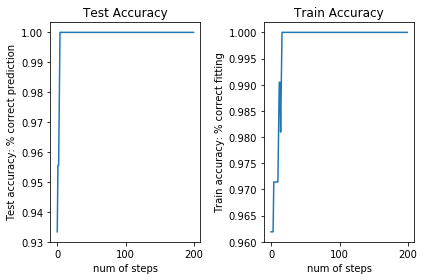

In [15]:

plt.subplot(1, 2, 1)

plt.plot(acc_test)
plt.xlabel("num of steps")
plt.ylabel("Test accuracy: % correct prediction")
plt.title("Test Accuracy")

plt.subplot(1, 2, 2)

plt.plot(acc_train)
plt.xlabel("num of steps")
plt.ylabel("Train accuracy: % correct fitting")
plt.title("Train Accuracy")

plt.tight_layout() # make two plots small overlap
plt.show()

In [16]:
COLs = []
for i in range( x_test_1.shape[0]):
    if y_test_1[i] == 0:
        COLs.append( "red")
    else:
        COLs.append( "blue")


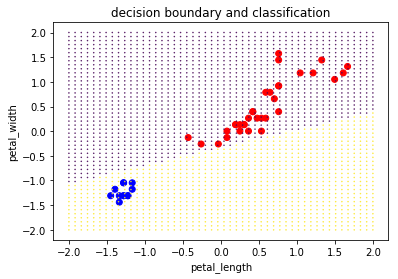

In [17]:

plt.scatter( x_test_1[x_test_1.columns[0]], x_test_1[x_test_1.columns[1]], c=COLs)
plt.scatter( newx[:,0], newx[:,1] , c= np.squeeze(Y_pred), \
            marker=".", s=1, cmap='viridis')
plt.xlabel("petal_length" )
plt.ylabel("petal_width" )
plt.title( "decision boundary and classification")
plt.show()


<h3>Finding and Thoughts</h3>

The good performance in classifying thte two species is not surprising since based on the two variables, the two species can be liearly separatable.
   

<h1>Part b:</h1>

In [22]:
x_2,y_2 = data_preprocessing(dataset,2,flower='Iris-virginica')
#generate traning and validation sets
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2,y_2,test_size=0.3)


Index(['petal_length', 'petal_width'], dtype='object')
species


<h2>Define hyper-parameter</h2>

In [29]:
#define number of training iterations
NUM_ITER = 200
#define learning rate (lr)
lr = 0.01

<h2>Define Placeholder and Variables</h2>

In [30]:
tf.reset_default_graph()

#define the placeholder to feed the training data later
# placeholder is for data input
X = tf.placeholder(tf.float32,shape=[None,2],name='X')
Y = tf.placeholder(tf.float32,shape=[None,1],name='Y')

#define the weights and initialized with random normal distribution
# variable is updating inside session 
W = tf.Variable(tf.random_normal([2,1]),tf.float32,name='W')
#define the bias with zero initialization
b = tf.Variable(tf.zeros([1,1]),tf.float32,name='b')


<h2>Define update rule and accuracy</h2>

In [31]:
#define the predicted output label, Tensorflow doesn't have step function, we use tf.round to do that
# tf functions are operations applied on placeholder, constant and variables 
Y_hat = tf.round(tf.sigmoid(tf.add(tf.matmul(X,W),b)))
#the error between target and logit
error = Y-Y_hat

#weight and bias update rule w(t+1) = w(t) + learning_rate * error * x
#weight and bias update rule w(t+1) = w(t) - learning_rate * dC/dW 
# dW = dC/dW = -W ( Y- Y_hat) = - W *error , so 
#weight and bias update rule w(t+1) = w(t) + learning_rate * dC/dW 
# all symbolic operations

dW = tf.matmul(tf.transpose(X),error)
db = tf.reduce_sum(error,0)
W_ = W + lr*dW  # W_ is the updated coefficient 
b_ = b + lr*db   # b_ is the updated biased coef

#group two operations together
# give W = W_ and b = b_
step = tf.group(W.assign(W_), b.assign(b_))

#compare the predicted labels with true labels
correct_pred = tf.equal(   tf.round( Y_hat )  , Y )  

#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

# generate grid of x 
ngrid = 50

newx = np.array(np.meshgrid( np.linspace(-2,2, ngrid) , np.linspace(-2,2, ngrid)  )).T.reshape(-1,2)



<h2>Execute training</h2>

In [32]:
#initialize tensorflow variables
# just define an operation init, need to run within tf session 
init = tf.global_variables_initializer()

acc_test = np.zeros( NUM_ITER)
acc_train = np.zeros(NUM_ITER)

#start tensorflow session
with tf.Session() as sess:
    #run initialization
    sess.run(init)
    #training for number of iterations
    for i in range(NUM_ITER):
        #every iteration we run optimization on the training data X and labels Y
        sess.run(step,feed_dict = {X:x_train_2,Y:y_train_2})
                
        acc_test[i] = sess.run(accuracy,feed_dict={X: x_test_2, Y: y_test_2 } )
        acc_train[i] = sess.run(accuracy,feed_dict={X: x_train_2, Y: y_train_2 } )
        if i % 1000 ==0:
            print("step "+str(i)+", train accuracy= {:.3f}".format(acc_train[i]))
            print("step "+str(i)+", test accuracy= {:.3f}".format(acc_test[i]))
    
    Y_pred =  sess.run( Y_hat  , feed_dict = {X: newx})
    
    W = (sess.run(W))
    b = (sess.run(b))
    
 
    

step 0, train accuracy= 0.781
step 0, test accuracy= 0.778


<h2>Plot</h2>

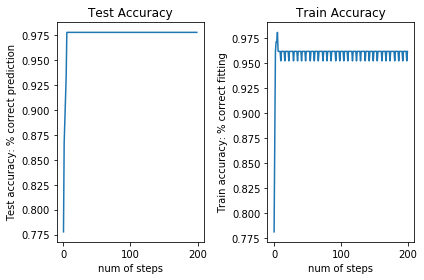

In [33]:

plt.subplot(1, 2, 1)

plt.plot(acc_test)
plt.xlabel("num of steps")
plt.ylabel("Test accuracy: % correct prediction")
plt.title("Test Accuracy")

plt.subplot(1, 2, 2)

plt.plot(acc_train)
plt.xlabel("num of steps")
plt.ylabel("Train accuracy: % correct fitting")
plt.title("Train Accuracy")

plt.tight_layout() # make two plots small overlap
plt.show()

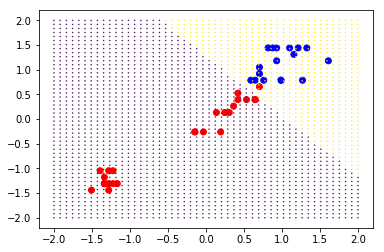

In [34]:
COLs = []
for i in range( x_test_2.shape[0]):
    if y_test_2[i] == 0:
        COLs.append( "red")
    else:
        COLs.append( "blue")


plt.scatter( x_test_2[x_test_2.columns[0]], x_test_2[x_test_2.columns[1]], c=COLs)
plt.scatter( newx[:,0], newx[:,1] , c= np.squeeze(Y_pred), \
            marker=".", s=1, cmap='viridis')

plt.show()

<h3>Finding and Thoughts</h3>

The performance in classifying thte two species is not as good as the last part. This is because the two species seems not quite well linearly separatable.


<h1>Part c:</h1>

In [35]:
x_3,y_3 = data_preprocessing(dataset,4)
#generate traning and validation sets
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3,y_3,test_size=0.3)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
species


In [167]:
# change y label into matrix of column 2 
#y_3

<h2>Define hyper-parameters</h2>

In [36]:
#learning rate
lr = 0.01
#number of traning steps
num_steps =1000

#network parameters
n_hidden_1 = 256
n_hidden_2 = 128

num_input = x_3.shape[1] # dimension of features 
num_classes = y_3.shape[1]

<h2>Define placehoder and variables</h2>

In [37]:
tf.reset_default_graph()

#tf graph input
X = tf.placeholder(tf.float32,[None,num_input],name='X')
Y = tf.placeholder(tf.float32,[None,num_classes],name='Y')

#Layers weight & bias
weights = {
    'W1': tf.Variable(tf.random_normal([num_input, n_hidden_1], stddev=1.0 ),name='W1'),
    'W2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], stddev=1.0 ),name='W2'),
    'Wout': tf.Variable(tf.random_normal([n_hidden_2, num_classes]),name='Wout')
}

biases = {
    'b1': tf.Variable(tf.zeros(shape=[n_hidden_1]),name='b1'),
    'b2': tf.Variable(tf.zeros(shape=[n_hidden_2]),name='b2'),
    'bout': tf.Variable(tf.zeros(shape=[num_classes]),name='bout')
}



<h2>Define the neural network</h2>

In [38]:
#define a neural net model
def neural_net(x):
    layer_1_out = tf.nn.relu(  tf.add(tf.matmul(x,weights['W1']),biases['b1']) )
    layer_2_out = tf.nn.relu( tf.add(tf.matmul(layer_1_out,weights['W2']),biases['b2']) )
    out =  tf.add(tf.matmul(layer_2_out,weights['Wout']),biases['bout'])  

    return out


<h2>Define cost function and accuracy</h2>

In [39]:
#predicted labels
logits = neural_net(X)
#define loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y),name='loss')

#define optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)

#compare the predicted labels with true labels
correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(Y,1))  

#compute the accuracy by taking average
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name='accuracy')

#Initialize the variables
init = tf.global_variables_initializer()


<h2>Execute training</h2>

In [40]:
acc_test = np.zeros( num_steps)
acc_train = np.zeros(num_steps)
with tf.Session() as sess:
    sess.run(init)
    
    for i in range(num_steps):
        
        #run optimization
        sess.run(train_op, feed_dict={X:x_train_3, Y:y_train_3})        
        acc_test[i] = sess.run(accuracy,feed_dict={X: x_test_3, Y: y_test_3 } )
        acc_train[i] = sess.run(accuracy,feed_dict={X: x_train_3, Y: y_train_3 } )
        if i % 100 ==0:
            print("step "+str(i)+", train accuracy= {:.3f}".format(acc_train[i]))
            print("step "+str(i)+", test accuracy= {:.3f}".format(acc_test[i]))
    
    print("Training finished!")
    
    print("Testing ACcuracy:", sess.run(accuracy, feed_dict={X:x_test_3, Y:y_test_3 }) )

step 0, train accuracy= 0.724
step 0, test accuracy= 0.600
step 100, train accuracy= 1.000
step 100, test accuracy= 0.822
step 200, train accuracy= 1.000
step 200, test accuracy= 0.822
step 300, train accuracy= 1.000
step 300, test accuracy= 0.822
step 400, train accuracy= 1.000
step 400, test accuracy= 0.822
step 500, train accuracy= 1.000
step 500, test accuracy= 0.822
step 600, train accuracy= 1.000
step 600, test accuracy= 0.822
step 700, train accuracy= 1.000
step 700, test accuracy= 0.822
step 800, train accuracy= 1.000
step 800, test accuracy= 0.822
step 900, train accuracy= 1.000
step 900, test accuracy= 0.822
Training finished!
Testing ACcuracy: 0.82222223


<h2>Plot</h2>

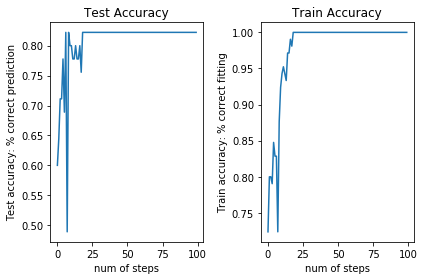

In [41]:

plt.subplot(1, 2, 1)

plt.plot(acc_test[:100])
plt.xlabel("num of steps")
plt.ylabel("Test accuracy: % correct prediction")
plt.title("Test Accuracy")

plt.subplot(1, 2, 2)

plt.plot(acc_train[:100])
plt.xlabel("num of steps")
plt.ylabel("Train accuracy: % correct fitting")
plt.title("Train Accuracy")

plt.tight_layout() # make two plots small overlap
plt.show()